In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [ ]:
from keras import backend as K
import keras.layers as layers
from keras.models import Model
from keras import Sequential
from keras.layers import Lambda, Dense, Flatten
from sklearn.metrics import roc_curve, roc_auc_score
from keras.losses import binary_crossentropy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

In [ ]:
G4_occupancy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_occupancy.npy")
GAN_occupancy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_occupancy.npy")

G4_Center = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_CenterOfGravity.npy")
GAN_Center = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_CenterOfGravity.npy")

G4_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_energy.npy")
GAN_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_energy.npy")

G4_longitud_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_longitud_energy.npy")
GAN_longitud_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_longitud_energy.npy")

In [5]:
G4_occupancy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_occupancy.npy")
GAN_occupancy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_occupancy.npy")

G4_Center30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_CenterOfGravity.npy")
GAN_Center30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_CenterOfGravity.npy")

G4_energy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_energy.npy")
GAN_energy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_energy.npy")

G4_longitud_energy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_longitud_energy.npy")
GAN_longitud_energy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_longitud_energy.npy")

G4_longitud_Moment_2_x = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_Moment_2_x_layers.npy")
GAN_longitud_Moment_2_x = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_Moment_2_x_layers.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_occupancy.npy'

In [ ]:
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_2_z.npy
LL_occupancy30 = np.load("/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_occupancy.npy")
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_2_y.npy
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_2_x.npy
LL_longitud_Moment_2_x = np.load("/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_2_x_layers.npy")
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_1_z.npy
LL_Center30 = np.load("/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_CenterOfGravity.npy")
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_1_x.npy
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_1_y.npy
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_1_y_layers.npy
LL_energy30 = np.load("/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_energy.npy")
LL_weights = np.load("/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_weights.npy")
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_2_y_layers.npy
#/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_1_x_layers.npy
LL_longitud_energy30 = np.load("/data0/bpnachman/DCTRGAN/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_longitud_energy.npy")

In [ ]:
plt.hist(LL_weights)

In [ ]:
G4_longitud_Moment_2_x = np.nan_to_num(G4_longitud_Moment_2_x)
GAN_longitud_Moment_2_x = np.nan_to_num(GAN_longitud_Moment_2_x)
LL_longitud_Moment_2_x = np.nan_to_num(LL_longitud_Moment_2_x)

In [ ]:
X30_G4 = np.c_[G4_occupancy30/1000.,G4_Center30,G4_energy30/1000.,G4_longitud_energy30/1000.]
X30_GAN = np.c_[GAN_occupancy30/1000.,GAN_Center30,GAN_energy30/1000.,GAN_longitud_energy30/1000.]

Z30_G4 = np.c_[G4_longitud_Moment_2_x]
Z30_GAN = np.c_[GAN_longitud_Moment_2_x]

In [ ]:
X30_LL = np.c_[LL_occupancy30/1000.,LL_Center30,G4_energy30/1000.,LL_longitud_energy30/1000.]
Z30_LL = np.c_[LL_longitud_Moment_2_x]

In [ ]:
X30 = np.concatenate([X30_G4,X30_GAN])
Y30 = np.concatenate([np.ones(len(X30_G4)),np.zeros(len(X30_GAN))])
Z30 = np.concatenate([Z30_G4,Z30_GAN])
#X30_train, X30_val, Y30_train, Y30_val, Z30_train, Z30_val = train_test_split(X30, Y30, Z30, test_size=0.5)

In [ ]:
np.save("X30_train",X30_train)
np.save("X30_val",X30_val)
np.save("Y30_train",Y30_train)
np.save("Y30_val",Y30_val)
np.save("Z30_train",Z30_train)
np.save("Z30_val",Z30_val)

In [ ]:
X30_train = np.load("X30_train.npy")
X30_val = np.load("X30_val.npy")
Y30_train = np.load("Y30_train.npy")
Y30_val = np.load("Y30_val.npy")
Z30_train = np.load("Z30_train.npy")
Z30_val = np.load("Z30_val.npy")

In [ ]:
#model30 = Sequential()
#model30.add(Dense(128, activation='relu',input_shape =(33,))) 
#model30.add(Dense(128, activation='relu'))
#model30.add(Dense(1, activation='sigmoid'))
#model30.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#hist_model30 = model30.fit(X30_train, Y30_train, epochs=50, batch_size=128,validation_data=(X30_val, Y30_val))

In [ ]:
model_json = model30.to_json()
with open("model_paper.json", "w") as json_file:
    json_file.write(model_json)
model30.save_weights("model_paper.h5")

In [ ]:
json_file = open('model_paper.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model30 = model_from_json(loaded_model_json)
model30.load_weights("model_paper.h5")

In [ ]:
plt.plot(hist_model30.history['loss'])
plt.plot(hist_model30.history['val_loss'])

In [ ]:
weights30_hold = model30.predict(X30_val)
weights30 = weights30_hold/(1.-weights30_hold)

In [ ]:
plt.hist(weights30[Y30_val==0],bins=np.linspace(0,2,20))

In [ ]:
def overlap_integral(h1,h2,outtype="text"):
    output = 0.
    for i in range(len(h1)):
        if (h1[i]+h2[i] > 0):
            output+=(h1[i]-h2[i])**2/(h1[i]+h2[i])
            pass
        pass
    if (outtype=="text"):
        return str(("%0.2E" % (0.5*output)).split("E")[0]+" \\times 10^{"+str(int(("%0.2E" % (0.5*output)).split("E")[1]))+"}")
    return 0.5*output

In [ ]:
def makeplotwithratio30(plotname,whichone=0,mybins=np.linspace(250,500,20),multiplier=1000,axisname=r"Number of Activated Cells"):

    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax0.minorticks_on()

    plt.xlabel(r"",fontsize=20)
    plt.ylabel(r"Normalized to unity",fontsize=20)
    plt.locator_params(axis='y', nbins=6)

    #Let's compute the uncertainty on the mean of the histogram.
    
    G4std = 1.
    GANstd = 1.
    DCTRGANstd = 1.
    DCTRLLstd = 1.
    if (whichone < 33):
    
        #print("G4",np.average(X30_val[Y30_val==1][:,whichone]*multiplier))
        #print("GAN",np.average(X30_val[Y30_val==0][:,whichone]*multiplier))
        #print("DCTRGAN",np.average(X30_val[Y30_val==0][:,whichone]*multiplier,weights=weights30[Y30_val==0][:,0]))

        G4 = X30_val[Y30_val==1][:,whichone]*multiplier
        GAN = X30_val[Y30_val==0][:,whichone]*multiplier
        LL = X30_LL[:,whichone]*multiplier
        DCTRweights = weights30[Y30_val==0][:,0]

        Nbootstraps = 200
        mydraws = np.random.poisson(1,[len(G4),Nbootstraps])
        G4std = np.std([np.average(G4,weights=mydraws[:,i]) for i in range(Nbootstraps)])
        mydraws = np.random.poisson(1,[len(GAN),Nbootstraps])
        GANstd = np.std([np.average(GAN,weights=mydraws[:,i]) for i in range(Nbootstraps)])
        mydraws = np.random.poisson(1,[len(GAN),Nbootstraps])
        DCTRGANstd = np.std([np.average(GAN,weights=mydraws[:,i]*DCTRweights) for i in range(Nbootstraps)])  
        mydraws = np.random.poisson(1,[len(LL),Nbootstraps])
        DCTRLLstd = np.std([np.average(LL,weights=mydraws[:,i]*LL_weights) for i in range(Nbootstraps)])  
        
    else:
        G4 = Z30_val[Y30_val==1][:,whichone-33]*multiplier
        GAN = Z30_val[Y30_val==0][:,whichone-33]*multiplier
        LL = Z30_LL[:,whichone-33]*multiplier
        DCTRweights = weights30[Y30_val==0][:,0]

        Nbootstraps = 200
        mydraws = np.random.poisson(1,[len(G4),Nbootstraps])
        G4std = np.std([np.average(G4,weights=mydraws[:,i]) for i in range(Nbootstraps)])
        mydraws = np.random.poisson(1,[len(GAN),Nbootstraps])
        GANstd = np.std([np.average(GAN,weights=mydraws[:,i]) for i in range(Nbootstraps)])
        mydraws = np.random.poisson(1,[len(GAN),Nbootstraps])
        DCTRGANstd = np.std([np.average(GAN,weights=mydraws[:,i]*DCTRweights) for i in range(Nbootstraps)])  
        mydraws = np.random.poisson(1,[len(LL),Nbootstraps])
        DCTRLLstd = np.std([np.average(LL,weights=mydraws[:,i]*LL_weights) for i in range(Nbootstraps)])  
    
    #print(G4std/G4std,GANstd/G4std,DCTRGANstd/G4std)
    
    overlapGAN = 1.
    overlapDGAN = 1.
    overlapLL = 1.
    overlapGANr = 1.
    overlapDGANr = 1.
    overlapLLr = 1.   
    
    if (whichone < 33):
        myn2,bmjj=np.histogram(X30_val[Y30_val==1][:,whichone]*multiplier,bins=mybins)
        myn,_=np.histogram(X30_val[Y30_val==0][:,whichone]*multiplier,bins=mybins)
        myn3,_=np.histogram(X30_val[Y30_val==0][:,whichone]*multiplier,weights=weights30[Y30_val==0][:,0],bins=mybins)
        myn4,_=np.histogram(X30_LL[:,whichone]*multiplier,weights=LL_weights,bins=mybins) 
    elif (whichone < 33+30):
        myn2,bmjj=np.histogram(Z30_val[Y30_val==1][:,whichone-33]*multiplier,bins=mybins)
        myn,_=np.histogram(Z30_val[Y30_val==0][:,whichone-33]*multiplier,bins=mybins)
        myn3,_=np.histogram(Z30_val[Y30_val==0][:,whichone-33]*multiplier,weights=weights30[Y30_val==0][:,0],bins=mybins)   
        myn4,_=np.histogram(Z30_LL[:,whichone-33]*multiplier,weights=LL_weights,bins=mybins) 
    if (whichone < 33):
        nG4,_=np.histogram(X30_val[Y30_val==1][:,whichone]*multiplier,bins=mybins,density=True)
        nGA,_=np.histogram(X30_val[Y30_val==0][:,whichone]*multiplier,bins=mybins,density=True)
        nGAD,_=np.histogram(X30_val[Y30_val==0][:,whichone]*multiplier,bins=mybins,weights=weights30[Y30_val==0][:,0],density=True) 
        nLLD,_=np.histogram(X30_LL[:,whichone]*multiplier,weights=LL_weights,bins=mybins,density=True) 
        plt.ylim([0,1.7*max([max(nG4),max(nGA),max(nGAD)])])
        _,_,_=plt.hist(X30_val[Y30_val==1][:,whichone]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(X30_val[Y30_val==0][:,whichone]*multiplier,alpha=0.5,bins=mybins,label=r"GAN ($\langle S^2\rangle="+overlap_integral(nG4,nGA)+", r="+"%0.1f" % float(GANstd/G4std)+"$)",density=True)
        _,_,_=plt.hist(X30_val[Y30_val==0][:,whichone]*multiplier,weights=weights30[Y30_val==0],color="black",bins=mybins,label=r"DCTRGAN ($\langle S^2\rangle="+overlap_integral(nG4,nGAD)+", r="+"%0.1f" % float(DCTRGANstd/G4std)+"$)",density=True,histtype="step",linewidth=3)
        _,_,_=plt.hist(X30_LL[:,whichone]*multiplier,weights=LL_weights,alpha=0.5,bins=mybins,color="black",label=r"LL DCTRGAN ($\langle S^2\rangle="+overlap_integral(nG4,nLLD)+", r="+"%0.1f" % float(DCTRLLstd/G4std)+"$)",density=True,histtype="step",linewidth=3,ls=":")
        overlapGAN = overlap_integral(nG4,nGA)
        overlapDGAN = overlap_integral(nG4,nGAD)
        overlapLL = overlap_integral(nG4,nLLD)
        overlapGANr = GANstd/G4std
        overlapDGANr = DCTRGANstd/G4std
        overlapLLr = DCTRLLstd/G4std
    elif (whichone<33+30):
        nG4,_=np.histogram(Z30_val[Y30_val==1][:,whichone-33]*multiplier,bins=mybins,density=True)
        nGA,_=np.histogram(Z30_val[Y30_val==0][:,whichone-33]*multiplier,bins=mybins,density=True)
        nGAD,_=np.histogram(Z30_val[Y30_val==0][:,whichone-33]*multiplier,bins=mybins,weights=weights30[Y30_val==0][:,0],density=True) 
        nLLD,_=np.histogram(Z30_LL[:,whichone-33]*multiplier,weights=LL_weights,bins=mybins,density=True) 
        plt.ylim([0,1.7*max([max(nG4),max(nGA),max(nGAD)])])
        _,_,_=plt.hist(Z30_val[Y30_val==1][:,whichone-33]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(Z30_val[Y30_val==0][:,whichone-33]*multiplier,alpha=0.5,bins=mybins,label=r"GAN ($\langle S^2\rangle="+overlap_integral(nG4,nGA)+", r="+"%0.1f" % float(GANstd/G4std)+"$)",density=True)
        _,_,_=plt.hist(Z30_val[Y30_val==0][:,whichone-33]*multiplier,weights=weights30[Y30_val==0],color="black",bins=mybins,label=r"DCTRGAN ($\langle S^2\rangle="+overlap_integral(nG4,nGAD)+", r="+"%0.1f" % float(DCTRGANstd/G4std)+"$)",density=True,histtype="step",linewidth=3) 
        _,_,_=plt.hist(Z30_LL[:,whichone-33]*multiplier,weights=LL_weights,alpha=0.5,bins=mybins,color="black",label=r"LL DCTRGAN ($\langle S^2\rangle="+overlap_integral(nG4,nLLD)+", r="+"%0.1f" % float(DCTRLLstd/G4std)+"$)",density=True,histtype="step",linewidth=3,ls=":")
        overlapGAN = overlap_integral(nG4,nGA)
        overlapDGAN = overlap_integral(nG4,nGAD)
        overlapLL = overlap_integral(nG4,nLLD)
        overlapGANr = GANstd/G4std
        overlapDGANr = DCTRGANstd/G4std
        overlapLLr = DCTRLLstd/G4std
        pass

    plt.legend(frameon=False,fontsize=15,loc="upper left")
    plt.xticks(fontsize=0)

    #plt.text(250,0.008,"50 GeV photons",fontsize=20)

    ax1 = plt.subplot(gs[1])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(direction="in",which="both")
    ax1.minorticks_on()
    plt.locator_params(axis='x', nbins=6)
    plt.xlabel(axisname,fontsize=20)
    plt.ylabel("Ratio to G4",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.axhline(y=1,linewidth=2, color='gray')   
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn3/sum(myn3))/(myn2/sum(myn2)),yerr=(myn3+myn2)**0.5/myn2,color='black',fmt='s')
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn4/sum(myn4))/(myn2/sum(myn2)),yerr=(myn4+myn2)**0.5/myn2,color='black',fmt='s',fillstyle='none')
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn/sum(myn))/(myn2/sum(myn2)),yerr=(myn+myn2)**0.5/myn2,color='#ff7f0e',fmt='o',alpha=0.5)
    plt.ylim(0.,2.5)
    
    return overlapGAN,overlapDGAN,overlapLL,overlapGANr,overlapDGANr,overlapLLr

    plt.savefig(plotname,bbox_inches='tight')

In [ ]:
makeplotwithratio30("Occupancy30.pdf",whichone=0,mybins=np.linspace(500,1000,20))

In [ ]:
metrics = []
metrics+=[makeplotwithratio30("TotalEnergy30.pdf",mybins=np.linspace(550,1050,20),whichone=2,axisname="Total Energy [GeV]")]
metrics+=[makeplotwithratio30("Occupancy30.pdf",whichone=0,mybins=np.linspace(500,1000,20))]
metrics+=[makeplotwithratio30("Center30.pdf",whichone=1,mybins=np.linspace(10,25,20),multiplier=1,axisname="Longitudinal Centroid")]
for i in range(30):
    mymax = 120
    if (i ==0):
        mymax = 2
    elif (i==1):
        mymax = 5
    elif (i==2):
        mymax = 15
    elif (i<5):
        mymax = 30
    elif (i==5):
        mymax = 40
    elif (i < 8):
        mymax = 60
    elif (i == 8):
        mymax = 80
    elif (i < 11):
        mymax = 100
    elif (i==20 or i==21):
        mymax = 80
    elif (i==22 or i==23):
        mymax = 60
    elif (i>26):
        mymax = 20
    elif (i>23):
        mymax=30
    metrics+=[makeplotwithratio30("EnergyLayer"+str(i)+"_30.pdf",mybins=np.linspace(0,mymax,20),whichone=3+i,axisname="Energy in Layer "+str(i)+" [GeV]")]
#Next, look at the moments
for i in range(30):
    mymax = 20
    if (i==0):
        mymax=1
    elif (i==1):
        mymax=2
    elif (i>20 and i <= 25):
        mymax = 30
    elif (i>25):
        mymax = 50
    metrics+=[makeplotwithratio30("XMomentLayer"+str(i)+"_30.pdf",mybins=np.linspace(0,mymax,20),multiplier=1,whichone=33+i,axisname=r"$\langle X^2\rangle$ in Layer "+str(i)+" [GeV]")]
    pass

In [ ]:
def makeplot2withratio30(plotname,whichone=0,whichtwo=1,mybins=np.linspace(250,500,20),multiplier=1000,axisname=r"Number of Activated Cells"):

    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax0.minorticks_on()

    plt.xlabel(r"",fontsize=20)
    plt.ylabel(r"Normalized to unity",fontsize=20)
    plt.locator_params(axis='y', nbins=6)

    #Let's compute the uncertainty on the mean of the histogram.
    
    G4std = 1.
    GANstd = 1.
    DCTRGANstd = 1.
    DCTRLLstd = 1.
    if (whichone < 33):
    
        #print("G4",np.average(X30_val[Y30_val==1][:,whichone]*multiplier))
        #print("GAN",np.average(X30_val[Y30_val==0][:,whichone]*multiplier))
        #print("DCTRGAN",np.average(X30_val[Y30_val==0][:,whichone]*multiplier,weights=weights30[Y30_val==0][:,0]))

        G4 = X30_val[Y30_val==1][:,whichone]*multiplier
        GAN = X30_val[Y30_val==0][:,whichone]*multiplier
        LL = X30_LL[:,whichone]*multiplier
        DCTRweights = weights30[Y30_val==0][:,0]

        Nbootstraps = 200
        mydraws = np.random.poisson(1,[len(G4),Nbootstraps])
        G4std = np.std([np.average(G4,weights=mydraws[:,i]) for i in range(Nbootstraps)])
        mydraws = np.random.poisson(1,[len(GAN),Nbootstraps])
        GANstd = np.std([np.average(GAN,weights=mydraws[:,i]) for i in range(Nbootstraps)])
        mydraws = np.random.poisson(1,[len(GAN),Nbootstraps])
        DCTRGANstd = np.std([np.average(GAN,weights=mydraws[:,i]*DCTRweights) for i in range(Nbootstraps)])  
        mydraws = np.random.poisson(1,[len(LL),Nbootstraps])
        DCTRLLstd = np.std([np.average(LL,weights=mydraws[:,i]*LL_weights) for i in range(Nbootstraps)])      
    
    overlapGAN = 1.
    overlapDGAN = 1.
    overlapLL = 1.
    overlapGANr = 1.
    overlapDGANr = 1.
    overlapLLr = 1.       
    
    if (whichone < 33):
        myn2,bmjj=np.histogram((X30_val[Y30_val==1][:,whichone]-X30_val[Y30_val==1][:,whichtwo])*multiplier,bins=mybins)
        myn,_=np.histogram((X30_val[Y30_val==0][:,whichone]-X30_val[Y30_val==0][:,whichtwo])*multiplier,bins=mybins)
        myn3,_=np.histogram((X30_val[Y30_val==0][:,whichone]-X30_val[Y30_val==0][:,whichtwo])*multiplier,weights=weights30[Y30_val==0][:,0],bins=mybins)
        myn4,_=np.histogram((X30_LL[:,whichone]-X30_LL[:,whichtwo])*multiplier,weights=LL_weights,bins=mybins) 
    if (whichone < 33):
        nG4,_=np.histogram((X30_val[Y30_val==1][:,whichone]-X30_val[Y30_val==1][:,whichtwo])*multiplier,bins=mybins,density=True)
        nGA,_=np.histogram((X30_val[Y30_val==0][:,whichone]-X30_val[Y30_val==0][:,whichtwo])*multiplier,bins=mybins,density=True)
        nGAD,_=np.histogram((X30_val[Y30_val==0][:,whichone]-X30_val[Y30_val==0][:,whichtwo])*multiplier,bins=mybins,weights=weights30[Y30_val==0][:,0],density=True) 
        nLLD,_=np.histogram((X30_LL[:,whichone]-X30_LL[:,whichtwo])*multiplier,weights=LL_weights,bins=mybins,density=True) 
        plt.ylim([0,1.7*max([max(nG4),max(nGA),max(nGAD)])])
        #_,_,_=plt.hist((X30_val[Y30_val==1][:,whichone]-X30_val[Y30_val==1][:,whichtwo])*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        #_,_,_=plt.hist((X30_val[Y30_val==0][:,whichone]-X30_val[Y30_val==0][:,whichtwo])*multiplier,alpha=0.5,bins=mybins,label=r"GAN ($\langle S^2\rangle="+overlap_integral(nG4,nGA)+"$)",density=True)
        #_,_,_=plt.hist((X30_val[Y30_val==0][:,whichone]-X30_val[Y30_val==0][:,whichtwo])*multiplier,weights=weights30[Y30_val==0],color="black",bins=mybins,label=r"DCTRGAN ($\langle S^2\rangle="+overlap_integral(nG4,nGAD)+"$)",density=True,histtype="step",linewidth=3)

        _,_,_=plt.hist((X30_val[Y30_val==1][:,whichone]-X30_val[Y30_val==1][:,whichtwo])*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist((X30_val[Y30_val==0][:,whichone]-X30_val[Y30_val==0][:,whichtwo])*multiplier,alpha=0.5,bins=mybins,label=r"GAN ($\langle S^2\rangle="+overlap_integral(nG4,nGA)+", r="+"%0.1f" % float(GANstd/G4std)+"$)",density=True)
        _,_,_=plt.hist((X30_val[Y30_val==0][:,whichone]-X30_val[Y30_val==0][:,whichtwo])*multiplier,weights=weights30[Y30_val==0],color="black",bins=mybins,label=r"DCTRGAN ($\langle S^2\rangle="+overlap_integral(nG4,nGAD)+", r="+"%0.1f" % float(DCTRGANstd/G4std)+"$)",density=True,histtype="step",linewidth=3)
        _,_,_=plt.hist((X30_LL[:,whichone]-X30_LL[:,whichtwo])*multiplier,weights=LL_weights,alpha=0.5,bins=mybins,color="black",label=r"LL DCTRGAN ($\langle S^2\rangle="+overlap_integral(nG4,nLLD)+", r="+"%0.1f" % float(DCTRLLstd/G4std)+"$)",density=True,histtype="step",linewidth=3,ls=":")
        overlapGAN = overlap_integral(nG4,nGA)
        overlapDGAN = overlap_integral(nG4,nGAD)
        overlapLL = overlap_integral(nG4,nLLD)
        overlapGANr = GANstd/G4std
        overlapDGANr = DCTRGANstd/G4std
        overlapLLr = DCTRLLstd/G4std        
        
    plt.legend(frameon=False,fontsize=15,loc="upper left")
    plt.xticks(fontsize=0)

    #plt.text(250,0.008,"50 GeV photons",fontsize=20)

    ax1 = plt.subplot(gs[1])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(direction="in",which="both")
    ax1.minorticks_on()
    plt.locator_params(axis='x', nbins=6)
    plt.xlabel(axisname,fontsize=20)
    plt.ylabel("Ratio to G4",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.axhline(y=1,linewidth=2, color='gray')   
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn3/sum(myn3))/(myn2/sum(myn2)),yerr=(myn3+myn2)**0.5/myn2,color='black',fmt='s')
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn/sum(myn))/(myn2/sum(myn2)),yerr=(myn+myn2)**0.5/myn2,color='#ff7f0e',fmt='o',alpha=0.5)
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn4/sum(myn4))/(myn2/sum(myn2)),yerr=(myn4+myn2)**0.5/myn2,color='black',fmt='s',fillstyle='none')
    plt.ylim(0.,2.5)

    plt.savefig(plotname,bbox_inches='tight')
    
    return overlapGAN,overlapDGAN,overlapLL,overlapGANr,overlapDGANr,overlapLLr

In [ ]:
metrics2=[]
for i in range(5,30):
    print(i)
    for j in range(i+1,30):
        print("    ",j)
        mymax = 50
        metrics2+=[makeplot2withratio30("EnergyLayer"+str(i)+"_"+str(j)+"_30.pdf",mybins=np.linspace(-mymax,mymax,20),whichone=3+i,whichtwo=3+j,axisname="Energy in Layer "+str(i)+" - Energy in Layer "+str(j)+" [GeV]")]
        #break

In [ ]:
metrics2array = np.array(metrics2)
metrics2array_float = []
for i in range(len(metrics2array)):
    val1 = float(metrics2array[i][0].split()[0])*10**int(metrics2array[i][0].split()[2].split("^")[1].split("}")[0].split("{")[1])
    val2 = float(metrics2array[i][1].split()[0])*10**int(metrics2array[i][1].split()[2].split("^")[1].split("}")[0].split("{")[1])
    val3 = float(metrics2array[i][2].split()[0])*10**int(metrics2array[i][2].split()[2].split("^")[1].split("}")[0].split("{")[1])
    val4 = float(metrics2array[i][3])
    val5 = float(metrics2array[i][4])
    val6 = float(metrics2array[i][5])
    metrics2array_float+=[[val1,val2,val3,val4,val5,val6]]
    pass
metrics2array_float = np.array(metrics2array_float)

In [ ]:
metricsarray = np.array(metrics)
metricsarray_float = []
for i in range(len(metricsarray)):
    val1 = float(metricsarray[i][0].split()[0])*10**int(metricsarray[i][0].split()[2].split("^")[1].split("}")[0].split("{")[1])
    val2 = float(metricsarray[i][1].split()[0])*10**int(metricsarray[i][1].split()[2].split("^")[1].split("}")[0].split("{")[1])
    val3 = float(metricsarray[i][2].split()[0])*10**int(metricsarray[i][2].split()[2].split("^")[1].split("}")[0].split("{")[1])
    val4 = float(metricsarray[i][3])
    val5 = float(metricsarray[i][4])
    val6 = float(metricsarray[i][5])
    metricsarray_float+=[[val1,val2,val3,val4,val5,val6]]
    pass
metricsarray_float = np.array(metricsarray_float)

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(metricsarray_float[:,0],bins=np.logspace(-5,-1,10),label="GAN",alpha=0.5)
plt.hist(metricsarray_float[:,1],bins=np.logspace(-5,-1,10),label="DCTRGAN",color="black",histtype="step",linewidth=3)
plt.hist(metricsarray_float[:,2],bins=np.logspace(-5,-1,10),label="LL DCTRGAN",color="black",histtype="step",linewidth=3,ls=":")
plt.xscale("log")
legend = plt.legend(frameon=False,fontsize=20,loc="upper left",title="Observable Ensemble")
legend.get_title().set_fontsize('20')
plt.xlabel(r"$\langle S^2\rangle$",fontsize=20)
plt.ylim([0,40])
plt.ylabel(r"Counts",fontsize=20)
plt.savefig("s2.pdf",bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(metricsarray_float[:,1]/metricsarray_float[:,0],bins=np.logspace(-2,1,10),label="High-level features",color="black",histtype="step",linewidth=3)
plt.hist(metricsarray_float[:,2]/metricsarray_float[:,0],bins=np.logspace(-2,1,10),label="Low-level features",color="black",histtype="step",linewidth=3,ls=":")
plt.xscale("log")
legend = plt.legend(frameon=False,fontsize=20,loc="upper left",title="Observable Ensemble")
legend.get_title().set_fontsize('20')
plt.xlabel(r"$\langle S^2\rangle$ DCTR GAN / $\langle S^2\rangle$ GAN",fontsize=20)
plt.ylim([0,45])
ax0.annotate("", xy=(2, 28), xytext=(1, 28),arrowprops=dict(arrowstyle="->",color="red",linewidth=2))
ax0.annotate("", xy=(0.5, 28), xytext=(1, 28),arrowprops=dict(arrowstyle="->",color="green",linewidth=2))
plt.axvline(x=1,color="grey",linewidth=5,alpha=0.5)
plt.text(0.15,27.2,"Better",fontsize=20,color="green")
plt.text(2.2,27.2,"Worse",fontsize=20,color="red")
plt.ylabel(r"Counts",fontsize=20)
plt.savefig("s2ratio.pdf",bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(metrics2array_float[:,0],bins=np.logspace(-5,-1,20),label="GAN",alpha=0.5)
plt.hist(metrics2array_float[:,1],bins=np.logspace(-5,-1,20),label="DCTRGAN",color="black",histtype="step",linewidth=3)
plt.hist(metrics2array_float[:,2],bins=np.logspace(-5,-1,20),label="LL DCTRGAN",color="black",histtype="step",linewidth=3,ls=":")
plt.xscale("log")
legend = plt.legend(frameon=False,fontsize=20,loc="upper left",title="Difference Observables")
legend.get_title().set_fontsize('20')
plt.xlabel(r"$\langle S^2\rangle$",fontsize=20)
plt.ylim([0,140])
plt.ylabel(r"Counts",fontsize=20)
plt.savefig("s2_diff.pdf",bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(metrics2array_float[:,1]/metrics2array_float[:,0],bins=np.logspace(-2,1,20),label="High-level features",color="black",histtype="step",linewidth=3)
plt.hist(metrics2array_float[:,2]/metrics2array_float[:,0],bins=np.logspace(-2,1,20),label="Low-level features",color="black",histtype="step",linewidth=3,ls=":")
plt.xscale("log")
legend = plt.legend(frameon=False,fontsize=20,loc="upper left",title="Difference Observables")
legend.get_title().set_fontsize('20')
plt.xlabel(r"$\langle S^2\rangle$ DCTR GAN / $\langle S^2\rangle$ GAN",fontsize=20)
plt.ylim([0,150])
ax0.annotate("", xy=(2, 90), xytext=(1, 90),arrowprops=dict(arrowstyle="->",color="red",linewidth=2))
ax0.annotate("", xy=(0.5, 90), xytext=(1, 90),arrowprops=dict(arrowstyle="->",color="green",linewidth=2))
plt.axvline(x=1,color="grey",linewidth=5,alpha=0.5)
plt.text(0.15,88,"Better",fontsize=20,color="green")
plt.text(2.2,88,"Worse",fontsize=20,color="red")
plt.ylabel(r"Counts",fontsize=20)
plt.savefig("s2ratio_diff.pdf",bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(metricsarray_float[:,3],bins=np.linspace(0,5,20),label="GAN",alpha=0.5)
plt.hist(metricsarray_float[:,4],bins=np.linspace(0,5,20),label="DCTRGAN",color="black",histtype="step",linewidth=3)
plt.hist(metricsarray_float[:,5],bins=np.linspace(0,5,20),label="LL DCTRGAN",color="black",histtype="step",linewidth=3,ls=":")
#plt.xscale("log")
legend = plt.legend(frameon=False,fontsize=20,loc="upper right",title="Observable Ensemble")
legend.get_title().set_fontsize('20')
plt.xlabel(r"$r$",fontsize=20)
plt.ylim([0,50])
plt.ylabel(r"Counts",fontsize=20)
plt.savefig("r_same.pdf",bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(metrics2array_float[:,3],bins=np.linspace(0,5,20),label="GAN",alpha=0.5)
plt.hist(metrics2array_float[:,4],bins=np.linspace(0,5,20),label="DCTRGAN",color="black",histtype="step",linewidth=3)
plt.hist(metrics2array_float[:,5],bins=np.linspace(0,5,20),label="LL DCTRGAN",color="black",histtype="step",linewidth=3,ls=":")
#plt.xscale("log")
legend = plt.legend(frameon=False,fontsize=20,loc="upper right",title="Difference Observables")
legend.get_title().set_fontsize('20')
plt.xlabel(r"$r$",fontsize=20)
plt.ylim([0,300])
plt.ylabel(r"Counts",fontsize=20)
plt.savefig("r_diff.pdf",bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.hist(weights30[Y30_val==0][:,0],bins=np.logspace(-5,2,20),label="High-level features",color="black",histtype="step",linewidth=3) #,density=True)
plt.hist(LL_weights,weights = 0.5*np.ones(len(LL_weights)),bins=np.logspace(-5,2,20),label="Low-level features",color="black",histtype="step",linewidth=3,ls=":") #,density=True)
plt.xscale("log")

legend = plt.legend(frameon=False,fontsize=20,loc="upper left")

plt.ylabel(r"Counts",fontsize=20)
plt.xlabel(r"Weights",fontsize=20)
plt.savefig("Weights.pdf",bbox_inches='tight')

In [ ]:
weights30_hold_LL = model30.predict(X30_LL)
weights30_LL = weights30_hold_LL/(1.-weights30_hold_LL)

In [ ]:
from scipy.stats import pearsonr

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.scatter(weights30_LL[0:1000],LL_weights[0:1000],s=10)
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-5,10])
plt.ylim([1e-5,10])
plt.xlabel(r"High-level Weights",fontsize=20)
plt.ylabel(r"Low-level Weights",fontsize=20)

plt.text(2e-5,2,r"$\rho = %0.2f$" % pearsonr(weights30_LL[0:1000][:,0],LL_weights[0:1000])[0],fontsize=20)
plt.savefig("Weights_scatter.pdf",bbox_inches='tight')

In [ ]:
!pwd

In [19]:
G4_occupancy30 =       np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_occupancy.npy")
G4_Center30 =          np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_CenterOfGravity.npy")
G4_energy30 =          np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_energy.npy")
G4_longitud_energy30 = np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_longitud_energy.npy")
G4_Moment_1_x30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_Moment_1_x.npy")
G4_Moment_1_y30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_Moment_1_y.npy")
G4_Moment_1_z30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_Moment_1_z.npy")
G4_Moment_2_x30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_Moment_2_x.npy")
G4_Moment_2_y30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_Moment_2_y.npy")
G4_Moment_2_z30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_Moment_2_z.npy")
G4_weights30 =         np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_weights.npy")

GAN_occupancy30 =       np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_occupancy.npy")
GAN_Center30 =          np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_CenterOfGravity.npy")
GAN_energy30 =          np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_energy.npy")
GAN_longitud_energy30 = np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_longitud_energy.npy")
GAN_Moment_1_x30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_Moment_1_x.npy")
GAN_Moment_1_y30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_Moment_1_y.npy")
GAN_Moment_1_z30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_Moment_1_z.npy")
GAN_Moment_2_x30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_Moment_2_x.npy")
GAN_Moment_2_y30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_Moment_2_y.npy")
GAN_Moment_2_z30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_Moment_2_z.npy")
#GAN_weights30 =         np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_weights.npy")
GAN_weights30 =         np.ones_like(GAN_occupancy30)


LL_occupancy30 =       np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_occupancy.npy")
LL_Center30 =          np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_CenterOfGravity.npy")
LL_energy30 =          np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_energy.npy")
LL_longitud_energy30 = np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_longitud_energy.npy")
LL_Moment_1_x30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_1_x.npy")
LL_Moment_1_y30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_1_y.npy")
LL_Moment_1_z30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_1_z.npy")
LL_Moment_2_x30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_2_x.npy")
LL_Moment_2_y30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_2_y.npy")
LL_Moment_2_z30 =      np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_Moment_2_z.npy")
LL_weights30 =         np.load("./data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/Low_Calib/LowSigmoidCalib_DiBiBAE_DCTR_Low_Calib_ep_1_weights.npy")


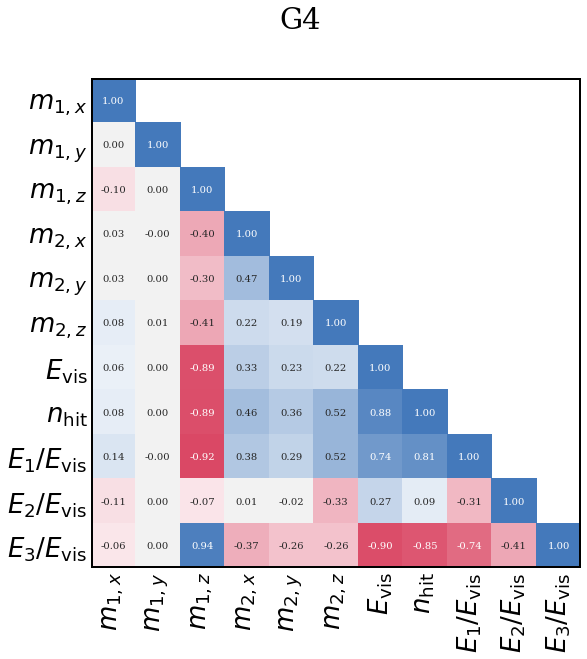

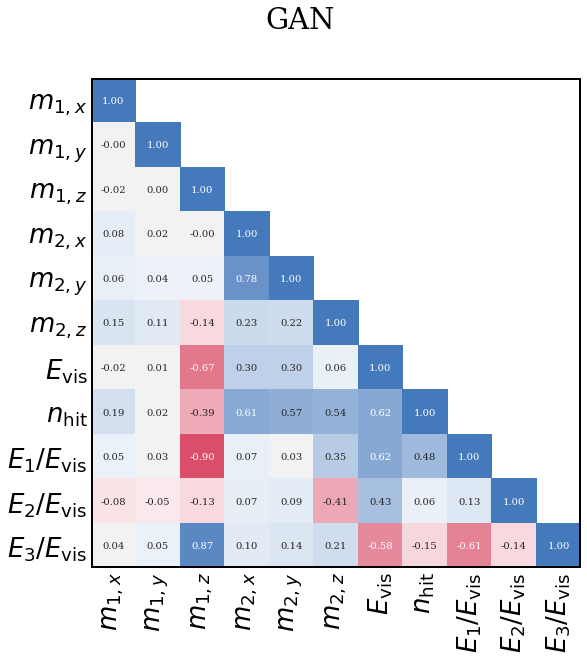

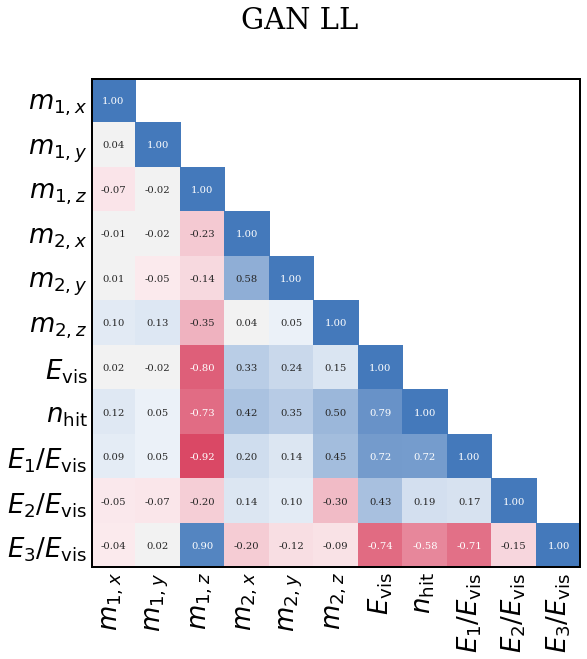

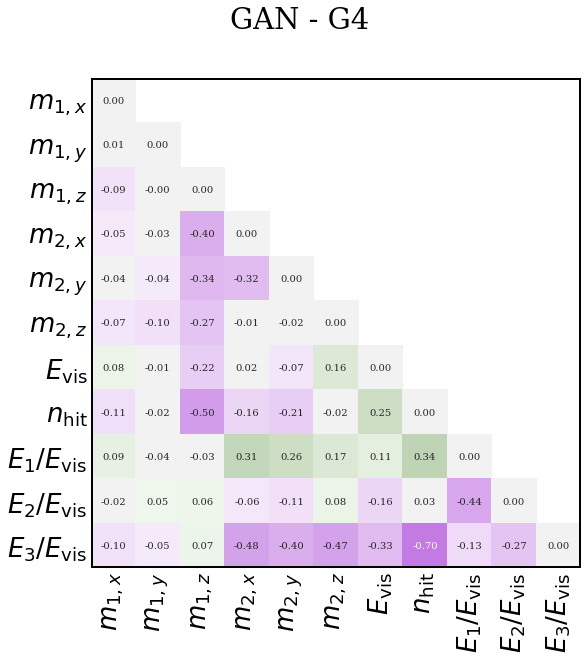

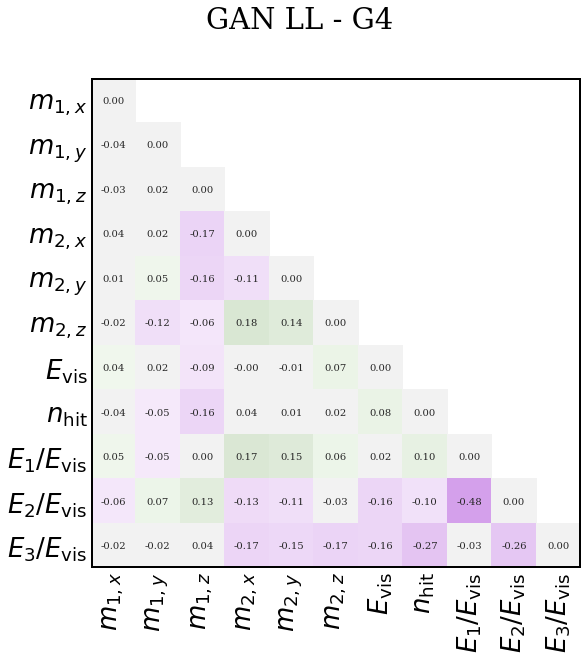

In [21]:




def m(x, w):
    """Weighted Mean"""
    return np.average(x, weights=w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.average((x - m(x, w)) * (y - m(y, w)), weights=w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

def runCorrelations_weigthed(name_list, data_list, weights, Model_title='ML Model', save_title='ML_model'):
    #First calculate relevant parameters from shower
    import seaborn as sns
    import pandas
    #Moments data[B,Z,X,Y]
  
    df_data = pandas.DataFrame(data=np.vstack(data_list).transpose(), columns = name_list)
    #correlations_full = pandas.DataFrame(index=name_list, columns = name_list)  
    correlations_full = pandas.DataFrame()  

    for name_i in name_list:
        for name_j in name_list:
            temp = corr(df_data[name_i], df_data[name_j], weights)
            #print(name_i, name_j)
            correlations_full.loc[name_i, name_j] = temp
    
    upper_triangle = np.ones((len(name_list),len(name_list)))
    upper_triangle[np.triu_indices(len(name_list),1)] = 0.0
    
    correlations = correlations_full.mask(upper_triangle == 0)
    
    fig_cor = plt.figure(figsize=(10,10))
    ax_cor = fig_cor.add_subplot(1,1,1)
    plt.gcf().subplots_adjust(left=0.2, bottom=0.2)

    temp1 = plt.rcParams['font.size']
    temp2 = plt.rcParams['font.family']

    
    plt.rcParams['font.size'] = 50 
    plt.rcParams['font.family'] = "serif"
    g = sns_plot = sns.heatmap((correlations),
        xticklabels=correlations.columns,
        yticklabels=correlations.index,
        cmap=sns.diverging_palette(5, 250, as_cmap=True),
        annot=True, ax=ax_cor, vmin=-1, vmax=1,
        annot_kws={"size": 10}, fmt=".2f", square=True, cbar=False, linewidths=0, linecolor='black'
        )
    
    ax_cor.axhline(y=0, color='k',linewidth=4)
    ax_cor.axhline(y=correlations.shape[1], color='k',linewidth=4)
    ax_cor.axvline(x=0, color='k',linewidth=4)
    ax_cor.axvline(x=correlations.shape[0], color='k',linewidth=4)

    g.tick_params(axis='both', which='both', length=0)
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 26, rotation='vertical')
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 26, rotation='horizontal')

    for tick in g.get_xmajorticklabels():
        tick.set_fontname("serif")

    for tick in g.get_ymajorticklabels():
        tick.set_fontname("serif")
    fig_cor.suptitle(Model_title, fontsize='29')
    fig_cor.savefig('./' + save_title+'_correlations.png')

    ax_cor.patch.set_facecolor('white')
    fig_cor.patch.set_facecolor('white')

    
    plt.rcParams['font.size'] = temp1
    plt.rcParams['font.family'] = temp2

    return correlations_full, name_list




def differenceCorrelations(cor_real, cor_fake, name_list, Model_title='ML Model', save_title='ML_model'):
    #First calculate relevant parameters from shower
    import seaborn as sns
    import pandas
    #Moments data[B,Z,X,Y]
    correlations_full = cor_real - cor_fake
    
    upper_triangle = np.ones((len(name_list),len(name_list)))
    upper_triangle[np.triu_indices(len(name_list),1)] = 0.0
    #print(upper_triangle)
    
    correlations = correlations_full.mask(upper_triangle == 0)
    
    fig_cor = plt.figure(figsize=(10,10))
    ax_cor = fig_cor.add_subplot(1,1,1)
    plt.gcf().subplots_adjust(left=0.2, bottom=0.2)

    temp1 = plt.rcParams['font.size']
    temp2 = plt.rcParams['font.family']
    
    cmap = sns.diverging_palette(290, 120, as_cmap=True)
    
    plt.rcParams['font.size'] = 50 
    plt.rcParams['font.family'] = "serif"
    g = sns_plot = sns.heatmap(correlations,
        xticklabels=correlations.columns,
        yticklabels=correlations.index,
        cmap=cmap,
        annot=True, ax=ax_cor, vmin=-1, vmax=1,
        annot_kws={"size": 10}, fmt=".2f", square=True, cbar=False
        )


    g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 26, rotation='vertical')
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 26, rotation='horizontal')


    for tick in g.get_xmajorticklabels():
        tick.set_fontname("serif")

    for tick in g.get_ymajorticklabels():
        tick.set_fontname("serif")
    fig_cor.suptitle(Model_title, fontsize='29')

    ax_cor.patch.set_facecolor('white')
    fig_cor.patch.set_facecolor('white')
    ax_cor.axhline(y=0, color='k',linewidth=4)
    ax_cor.axhline(y=correlations.shape[1], color='k',linewidth=4)
    ax_cor.axvline(x=0, color='k',linewidth=4)
    ax_cor.axvline(x=correlations.shape[0], color='k',linewidth=4)

    g.tick_params(axis='both', which='both', length=0)

    fig_cor.savefig('./' + save_title+'_correlations_diff.png')

    plt.rcParams['font.size'] = temp1
    plt.rcParams['font.family'] = temp2

    
    return correlations_full






layers = 30
name_list = []
G4_data_list = []
GAN_data_list = []
LL_data_list = []

G4_data_list.append(G4_Moment_1_x30)
G4_data_list.append(G4_Moment_1_y30)
G4_data_list.append(G4_Moment_1_z30)    
GAN_data_list.append(GAN_Moment_1_x30)
GAN_data_list.append(GAN_Moment_1_y30)
GAN_data_list.append(GAN_Moment_1_z30)    
LL_data_list.append(LL_Moment_1_x30)
LL_data_list.append(LL_Moment_1_y30)
LL_data_list.append(LL_Moment_1_z30)    
name_list.append('$m_{1, x}$')
name_list.append('$m_{1, y}$')
name_list.append('$m_{1, z}$')

G4_data_list.append(G4_Moment_2_x30)
G4_data_list.append(G4_Moment_2_y30)
G4_data_list.append(G4_Moment_2_z30)    
GAN_data_list.append(GAN_Moment_2_x30)
GAN_data_list.append(GAN_Moment_2_y30)
GAN_data_list.append(GAN_Moment_2_z30)    
LL_data_list.append(LL_Moment_2_x30)
LL_data_list.append(LL_Moment_2_y30)
LL_data_list.append(LL_Moment_2_z30)    
name_list.append('$m_{2, x}$')
name_list.append('$m_{2, y}$')
name_list.append('$m_{2, z}$')

G4_data_list.append(G4_energy30)    
GAN_data_list.append(GAN_energy30)    
LL_data_list.append(LL_energy30)    
name_list.append('$E_{\\mathrm{vis}}$')

G4_data_list.append(G4_occupancy30)    
GAN_data_list.append(GAN_occupancy30)    
LL_data_list.append(LL_occupancy30)    
name_list.append('$n_{\\mathrm{hit}}$')

frac1 = int(1/3*layers)
frac2 = int(2/3*layers)
frac3 = int(3/3*layers)

ratio1_total = np.sum(G4_longitud_energy30[:,0:frac1], axis=(1))/G4_energy30
ratio2_total = np.sum(G4_longitud_energy30[:,frac1:frac2], axis=(1))/G4_energy30
ratio3_total = np.sum(G4_longitud_energy30[:,frac2:frac3], axis=(1))/G4_energy30
G4_data_list.append(ratio1_total)    
G4_data_list.append(ratio2_total)    
G4_data_list.append(ratio3_total)  
ratio1_total = np.sum(GAN_longitud_energy30[:,0:frac1], axis=(1))/G4_energy30
ratio2_total = np.sum(GAN_longitud_energy30[:,frac1:frac2], axis=(1))/G4_energy30
ratio3_total = np.sum(GAN_longitud_energy30[:,frac2:frac3], axis=(1))/G4_energy30
GAN_data_list.append(ratio1_total)    
GAN_data_list.append(ratio2_total)    
GAN_data_list.append(ratio3_total)  
ratio1_total = np.sum(LL_longitud_energy30[:,0:frac1], axis=(1))/G4_energy30
ratio2_total = np.sum(LL_longitud_energy30[:,frac1:frac2], axis=(1))/G4_energy30
ratio3_total = np.sum(LL_longitud_energy30[:,frac2:frac3], axis=(1))/G4_energy30
LL_data_list.append(ratio1_total)    
LL_data_list.append(ratio2_total)    
LL_data_list.append(ratio3_total)  

name_list.append('$E_{1}/E_{\\mathrm{vis}}$')
name_list.append('$E_{2}/E_{\\mathrm{vis}}$')
name_list.append('$E_{3}/E_{\\mathrm{vis}}$')

corl_G4, _ = runCorrelations_weigthed(name_list=name_list, data_list=G4_data_list, weights=G4_weights30, Model_title='G4', save_title='G4')
corl_GAN, _ = runCorrelations_weigthed(name_list=name_list, data_list=GAN_data_list, weights=GAN_weights30, Model_title='GAN', save_title='GAN')
corl_LL, _ = runCorrelations_weigthed(name_list=name_list, data_list=LL_data_list, weights=LL_weights30, Model_title='GAN LL', save_title='GAN_LL')

_ = differenceCorrelations(cor_real=corl_G4, cor_fake=corl_GAN, name_list=name_list, Model_title='GAN - G4', save_title='GAN_G4_diff')
_ = differenceCorrelations(cor_real=corl_G4, cor_fake=corl_LL, name_list=name_list, Model_title='GAN LL - G4', save_title='GAN_LL_G4_diff')